<a href="https://colab.research.google.com/github/nalika/ESOF4011/blob/main/Tutorial_Ensembles_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ensembles Sklearn ESOF 4011 Tutorial** 

Lab Instructor: Robert Hertel

Note: Please share all links with me in the future by pressing share in the top right corner

Introduction Format:

Student Name: Robert Hertel

Sudent ID: XXXXXX

Lab No.: 9b 

Colab link: https://colab.research.google.com/drive/1X6k1SrQnrJ9HliR5ymEy2TRF0vY_I0dD#scrollTo=Oa2sqKK9BgWc



# **Load Libraries**

In [ ]:
import numpy as np
import warnings
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

# **Load the Dataset**

Normalize the data: map each feature value from its current representation (an integer between 0
and 255) to a floating-point value between 0 and 1.0.

Store the floating-point values in x_train_normalized and x_test_normalized.

Map the class label to a on-hot-encoded value. Store in y_train_encoded and y_test_encoded.

In [ ]:
iris = datasets.load_iris()
X, y = iris.data[:, [0,3]], iris.target # take two columns {columns 1 and 4}.

# **Create Ensembles**



# Majority Voting

Think of this intuitively as asking a commitee of experts how they classified something. For instance, if there are COVID-19 vs non-COVID-19 X-rays and 5 radiologists. Each radiologist votes and there final accuracy and sensitivity are determined. This is common practice in the real world and we can include this practice into our classifiers


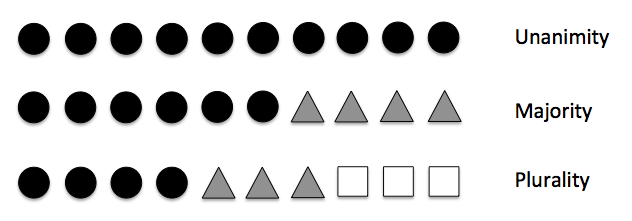

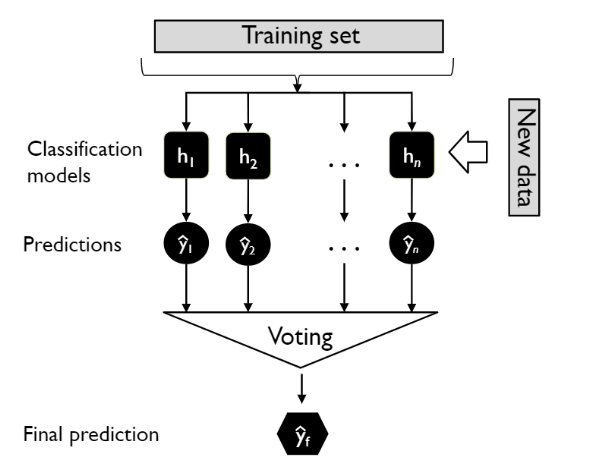

Hard Majority Voting

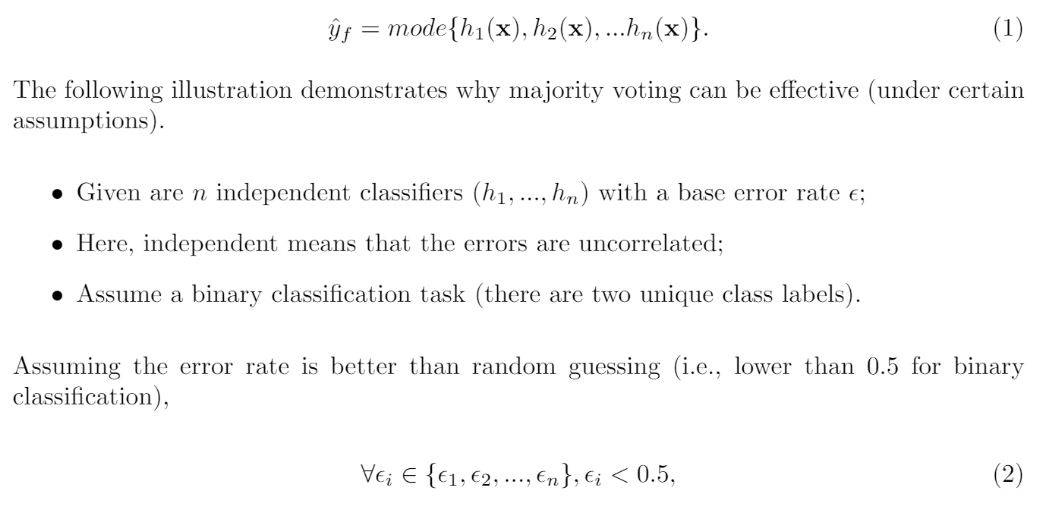

In hard voting (also known as majority voting), every individual classifier votes for a class, and the majority wins. In statistical terms, the predicted target label of the ensemble is the **mode** of the distribution of individually predicted labels.

In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.

Soft Majority voting

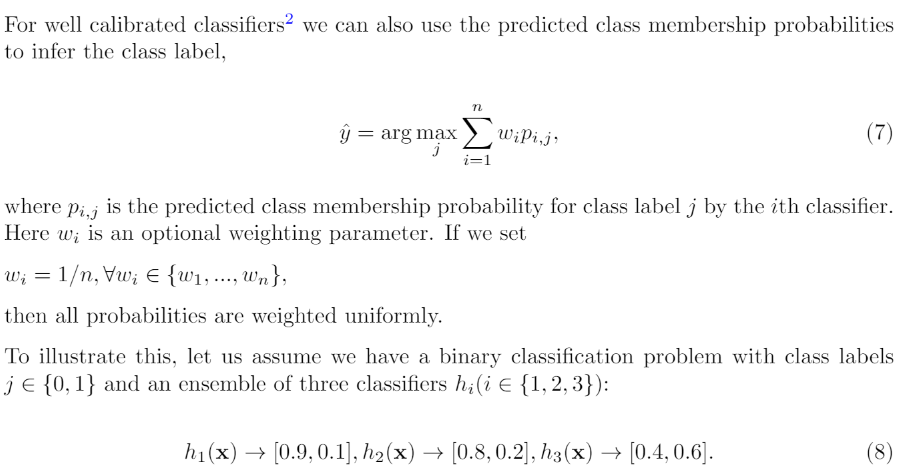

The Weights of the classifiers in this problem are w1 = 0.2 w2 = 0.2 and w3 = 0.6


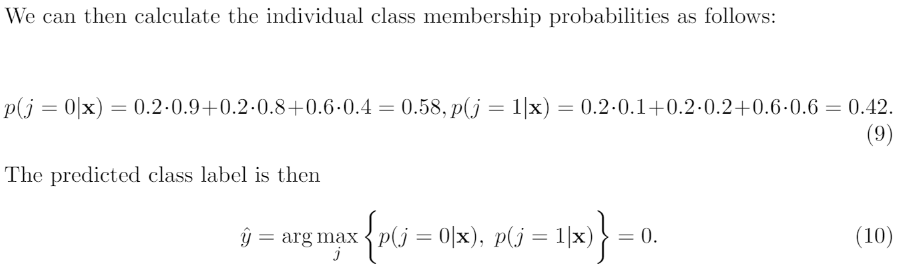

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

from sklearn.ensemble import VotingClassifier

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):
    print(clf)
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.95 (+/- 0.03) [Logistic Regression]
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
Accuracy: 0.93 (+/- 0.05) [Random Forest]
GaussianNB(priors

In [ ]:
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                   voting = 'hard')

In [ ]:
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                   voting = 'soft')

In [ ]:
labels_new = ['Logistic Regression', 'Random Forest', 'Naive Bayes',
              'Voting_Classifier_Hard', 'Voting_Classifier_Soft']

for (clf, label) in zip([clf1, clf2, clf3, voting_clf_hard,
                        voting_clf_soft], labels_new):
    scores = model_selection.cross_val_score(clf, X, y, cv=5,
            scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.03) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.95 (+/- 0.03) [Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [Voting_Classifier_Hard]
Accuracy: 0.95 (+/- 0.03) [Voting_Classifier_Soft]


For more details regarding majority voting the following video is helpful: https://www.youtube.com/watch?v=EFk21H6Q1ew&list=PLTKMiZHVd_2KyGirGEvKlniaWeLOHhUF3&index=40

#Bagging

Bagging works on high variance models by reducing the variance through averaging

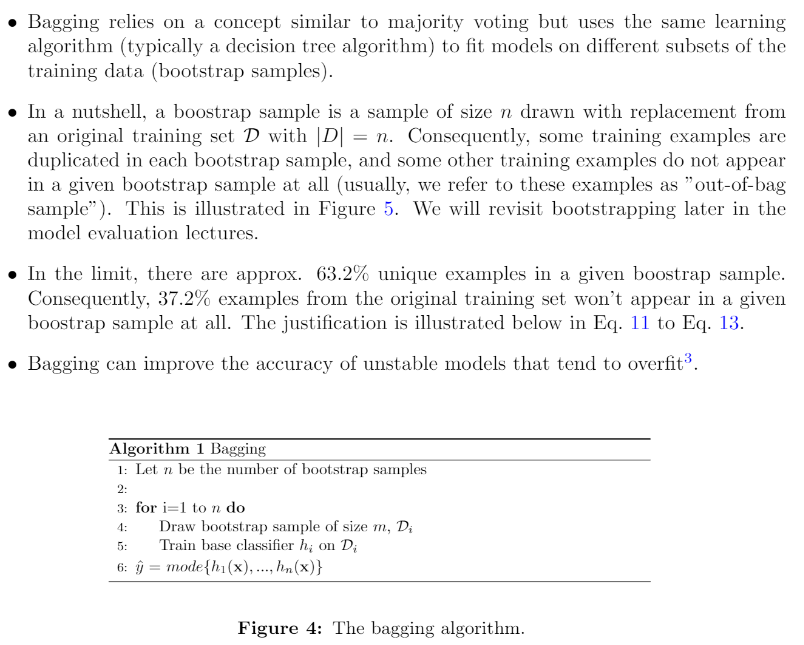

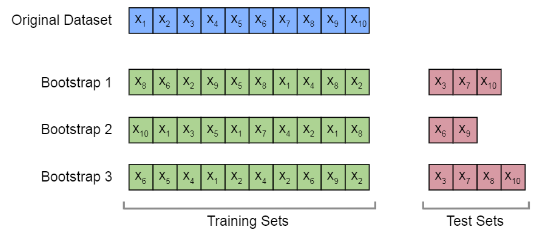

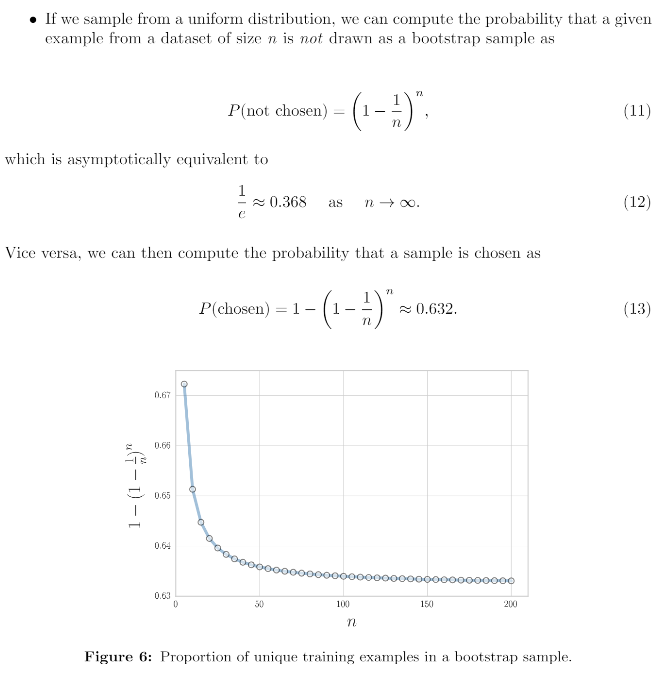

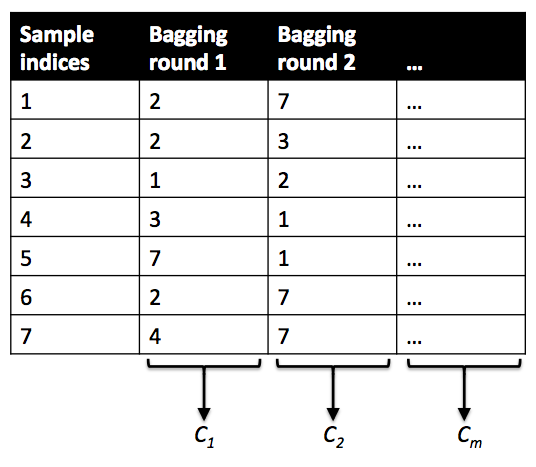

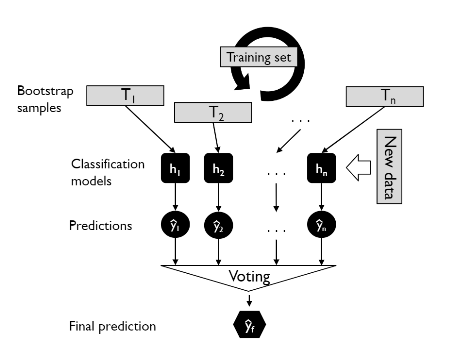

**Bootstrapping example for Illustration**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Using the same iris dataset as before ...

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('train/valid/test sizes:', y_train.shape[0], y_val.shape[0], y_test.shape[0])

train/valid/test sizes: 84 28 38


Define Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=None)

Max depth = none meaning the decision tree below is unprunned

Traditionally for bagging we use unprunned decision trees but its also possible to use something else

The number of estimators is equal to the number of bootstrap rounds that we have

We can set bootstrapping to false but then it is not truly bagging

Setting the number of jobs is for parallelization in terms of the number of cpus you want working on bootstrapped samples. You therefore don't haave to wait for Bagging Round 1 to be computed before moving on the bagging round 2. We can do multiple rounds at the same time

OOB stands for out of bag score. It refers to the sample that are outside of the bootstrapping. Only ~63% of samples are in a bootstrapped sampling

In [ ]:
bag = BaggingClassifier(base_estimator=tree, 
                        n_estimators=100,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        max_samples=1.0,
                        random_state = 1,
                        n_jobs=1)

In [ ]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,


In scikit-learn the trailing underscore indicates OOB score is available after model fitting



In [ ]:
print("OOb_score: %0.2f" % bag.oob_score_)
print("Test Accuracy: %0.2f" % bag.score(X_test, y_test))

OOb_score: 0.93
Test Accuracy: 0.95


Note: We didn't use the validation set here. After changing parameters like n_estimators we can use the validation set for model tuning. Afterwards the test set can be used for obtaining true test results

#Boosting

With boosting we have high bias models with low variance because we look at very simple decision tree stumps. We boost these decision tree stumpts with a high bias to get a better performance out of the model

Originally proposed in 1997 Adapttive Boosting - Adaboost

Later updated in 2001 with Gradient Boosting - The algorithm was out of favor at first because its computationally expensive. Later has found more utility with new algorithm like XGBoost and LightGBM. These algorithms are nowadays more popular than adaboost but adaboost is helpful in understanding the main boosting procedure

Boosting is different than bagging in that there is a dependency between the rounds. With bagging you can set the # of jobs where each job is a separate process that can be run on an independent cpu core. Each round however in boosting trains a classifier --> sees which classes the classifier works well on --> then fixes the weights for the round to train the next classifier. You therefore need to wait before each classifier is fitted to set the weights in the samples for training the next classifier. This causes the process to not be parallelized.

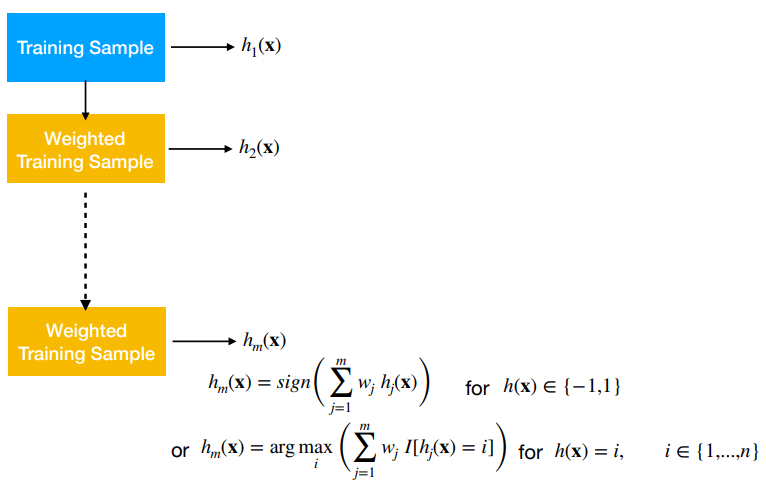

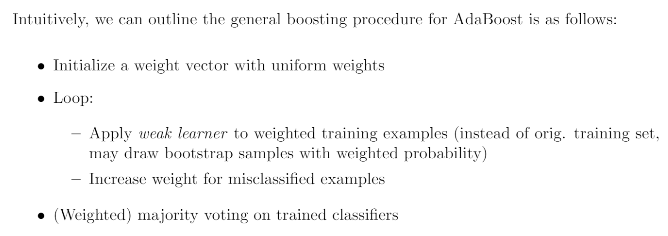

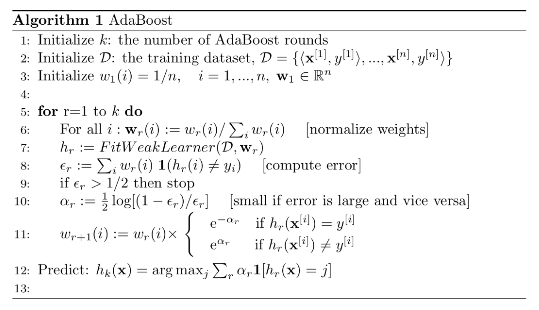

k is the number of Adaboost rounds ie the number of classifiers beings fit

D is the training dataset that consists of n training datapoints

w1(i) - the subscript stand for the round. Here the first round. (i) stands for the index of each training datapoint ie the weights of each training datapoint. W1(2) therefore would the the weigth of the 2nd training datapoint up to n because there are n training datapoints. The main point here is that each training point receives its own weights

First we divide the training sample weights by the sum of the training sample weights to normalize the weights for each round. This causes the weights of each round to sum up to one

Second we fit the weak learner on the weighted training set for each round

Third we compute the prediction error that is weighted for each training point. Here we are summing up the prediciton errors and weighting them by the training set weights. The 1 stands for the "indicator function". The "indicator function" function return 1 if hr(i) != y(i) and 0 otherwise. This therefore tallies up the number of errors (it only returns errors) weighted by the training set weight

Fourth we stop if the error is greater than 50 percent. If the error is worse than random guessing than we stop the whole adaboost algorithm. Its kind of a form of early stopping. We could set k to 200 but if after 100 rounds the error is worse than random guessing we stop training

Fifth we compute alpha which is used in calculating the weights. In calculating wr+1(i) which is the weights for the next round we calcuclate it with the current weights x the top term if the prediction is correct and the bottom term if the prediction is incorrect.

Sixth the alpha term is a weight for each classifier(round) 

A very important point to make here is that the wr(i) are the sample weights whereas as the alphas are the estimator(classifier for each round) weights

For the alphas if the error is small alpha is large. If the error is large the alpha is small

For example if error 0.5 --> log([1-0.5]/0.5) = 0, if error is 0.01 --> log ([1-0.01]/0.01) = 2. We get a sort of chart like this beacuse of the log if we were to insert more points







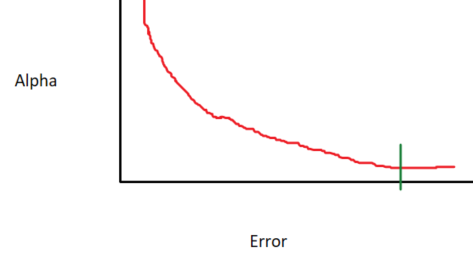

Alpha therefore determines the final importance of each classifier in the final prediction. If we have a large error, as seen in green at the green line, then alpha will be relatively small and the classifier for that round will not be as important in the final prediction. 

**Important:** A classifier with a high error has less importance in the final prediction

With the sample weights for the next round wr+1(i). If we make a correct prediction we downweight the training weight of the next round as 1/e^(Alpha_r) is a small value. If we make a orrect prediction we don't have to pay too much attention to that training example and we should focus more of our efforts on the training examples that are hard to predict

If we make a we make a wrong prediction wr+1(i) for the next round gets an increased weight

**Example Code**

In [ ]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier

iris = datasets.load_iris()
X, y = iris.data[:, [0, 3]], iris.target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train/Valid/Test sizes:', y_train.shape[0], y_val.shape[0], y_test.shape[0])

tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=1) # With Adaboost we are dealing with tree stumps, previously in bagging we had high variance classifiers. Here we have high bias classifiers


boost = AdaBoostClassifier(base_estimator=tree,
                           n_estimators=500,
                           algorithm='SAMME',
                           #n_jobs=1,
                           random_state=1)

boost.fit(X_train, y_train)
    
print("Test Accuracy: %0.2f" % boost.score(X_test, y_test))

Train/Valid/Test sizes: 84 28 38
Test Accuracy: 0.97


Toy Example of Adaboosting:

Give the wrong examples in each round a higher weight and everything that is correct weight lower

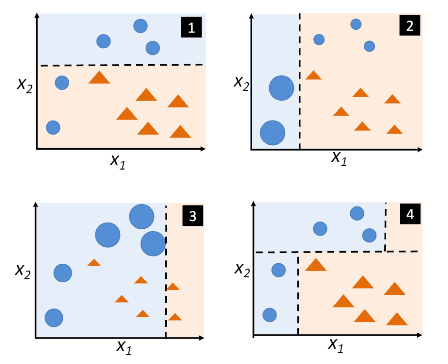

If interested in viewing the multiclass Adaboost original paper check out:

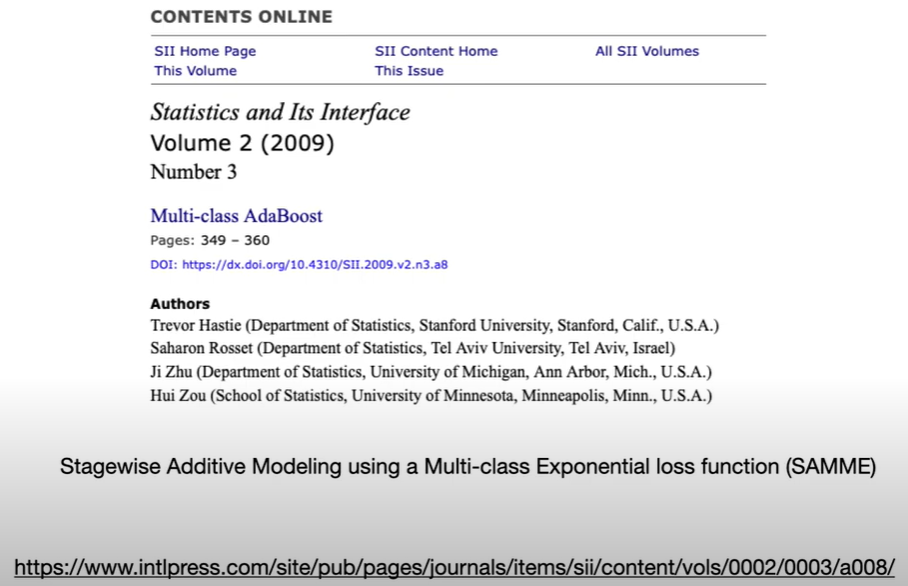

# Random Forests

*Decision Trees* - 
Based on which feature maxmizes information gain in a decision tree it the best feature is chosen at a given node.

*Bagging* - In Bagging typically all the features at the node are considered. 

*Random Forest Classifiers* - Bagging plus at each node the random forest only sees a random subset of features

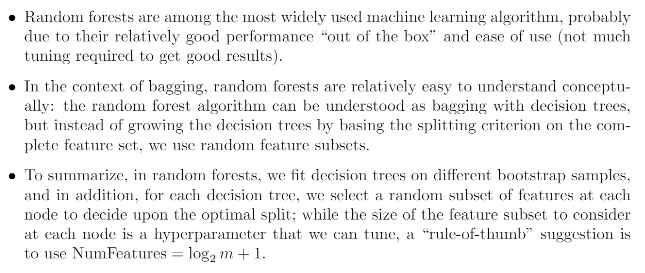

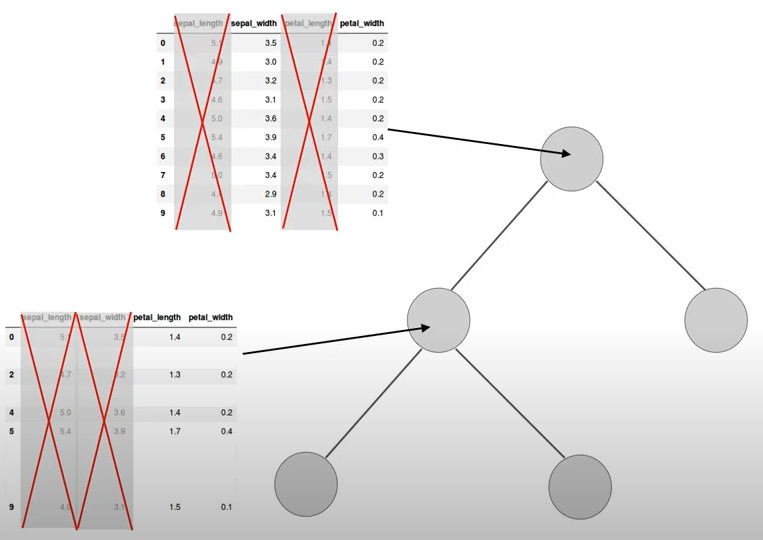

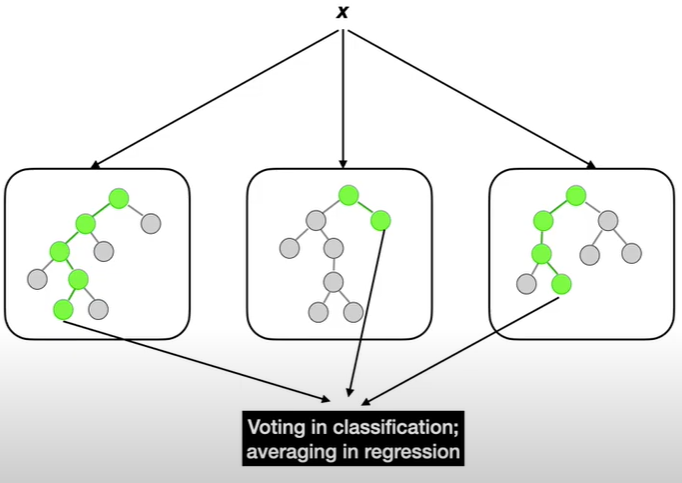

Important Note:

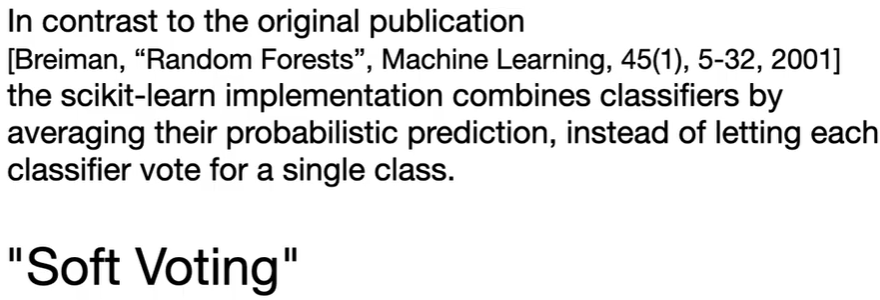

**Code Example**

There's also an n_jobs parameter that you can set to be 1 for 1 cpu or -1 for all the cpus

In practice the larger number of estimators (decision trees) the better. This will be limited to hardware limitations of your computer. The reason for making this note is that you should not tune the number of estimators as a hyperparameter but choose the biggest one you can afford on your computer

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,
                                random_state=1)

forest.fit(X_train, y_train)
    
print("Test Accuracy: %0.2f" % forest.score(X_test, y_test))

Test Accuracy: 0.95


#Stacking

Fitting a second level meta-classifier onto a series of first level classifiers

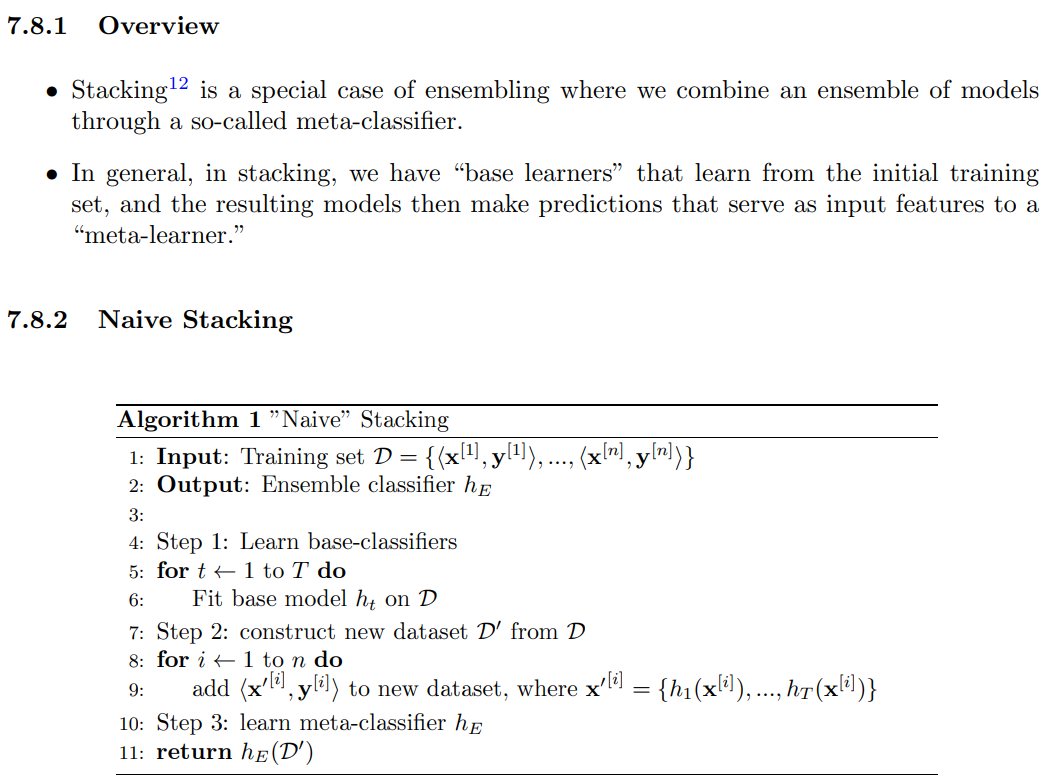

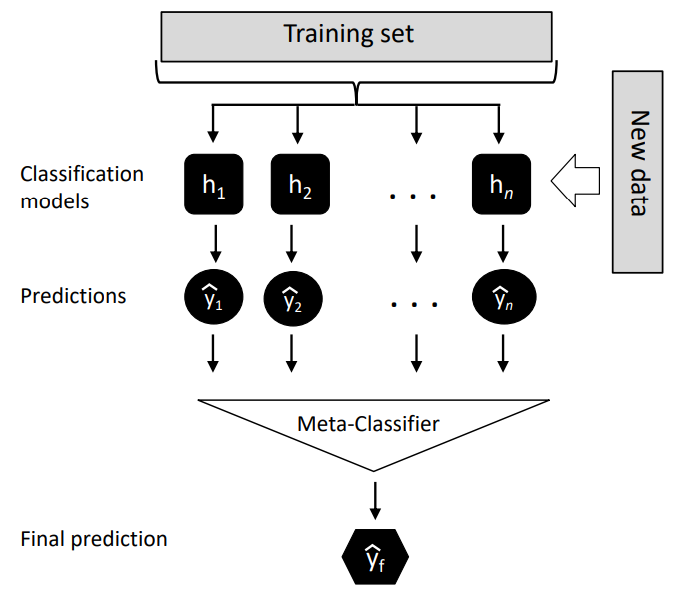

**Simplest Case of Stacking Classifier**

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = HistGradientBoostingClassifier(random_state=1)
clf4 = AdaBoostClassifier(random_state=1)
clf5 = DecisionTreeClassifier(random_state=1,
                              max_depth=None)

lr = LogisticRegression(random_state=1)

estimators = [('clf1', clf1),
              ('clf2', clf2),
              ('clf3', clf3),
              ('clf4', clf4),
              ('clf5', clf5)]

sclf = StackingClassifier(estimators=estimators, 
                          final_estimator=lr)


sclf.fit(X_train, y_train)
print("Train Accuracy: %0.2f" % sclf.score(X_train, y_train))
print("Test Accuracy: %0.2f" % sclf.score(X_test, y_test))

Train Accuracy: 0.98
Test Accuracy: 0.95


The problem with the naive stacking algorithm outlined above is that it has a
high tendency to suffer from extensive overfitting. The reason for a potentially high degree
of overfitting is that if the base learners overfit, then the meta-classifier heavily relies on
these predictions made by the base-classifiers. A better alternative would be to use stacking
with k-fold cross-validation or leave-one-out cross-validation.

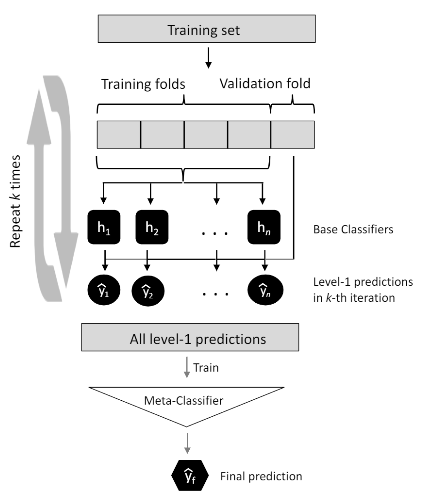

**Stacking Classifier with Cross Validation**

In [ ]:

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = HistGradientBoostingClassifier(random_state=1)
clf4 = AdaBoostClassifier(random_state=1)
clf5 = DecisionTreeClassifier(random_state=1,
                              max_depth=None)

lr = LogisticRegression(random_state=1)

estimators = [('clf1', clf1),
              ('clf2', clf2),
              ('clf3', clf3),
              ('clf4', clf4),
              ('clf5', clf5)]

sclf = StackingClassifier(estimators=estimators, 
                          final_estimator=lr, 
                          cv=10)

sclf.fit(X_train, y_train)
print("Train Accuracy: %0.2f" % sclf.score(X_train, y_train))
print("Test Accuracy: %0.2f" % sclf.score(X_test, y_test))

Train Accuracy: 0.98
Test Accuracy: 0.95
